### Importación de datos



In [59]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [60]:

tienda = pd.read_csv(url)

#1. Análisis de facturación



In [61]:
#Calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

for nombre, df in tiendas.items():
    ingreso_total = df["Precio"].sum()
    print(f" {nombre}: Ingreso total = ${ingreso_total:,.2f}")

 Tienda 1: Ingreso total = $1,150,880,400.00
 Tienda 2: Ingreso total = $1,116,343,500.00
 Tienda 3: Ingreso total = $1,098,019,600.00
 Tienda 4: Ingreso total = $1,038,375,700.00


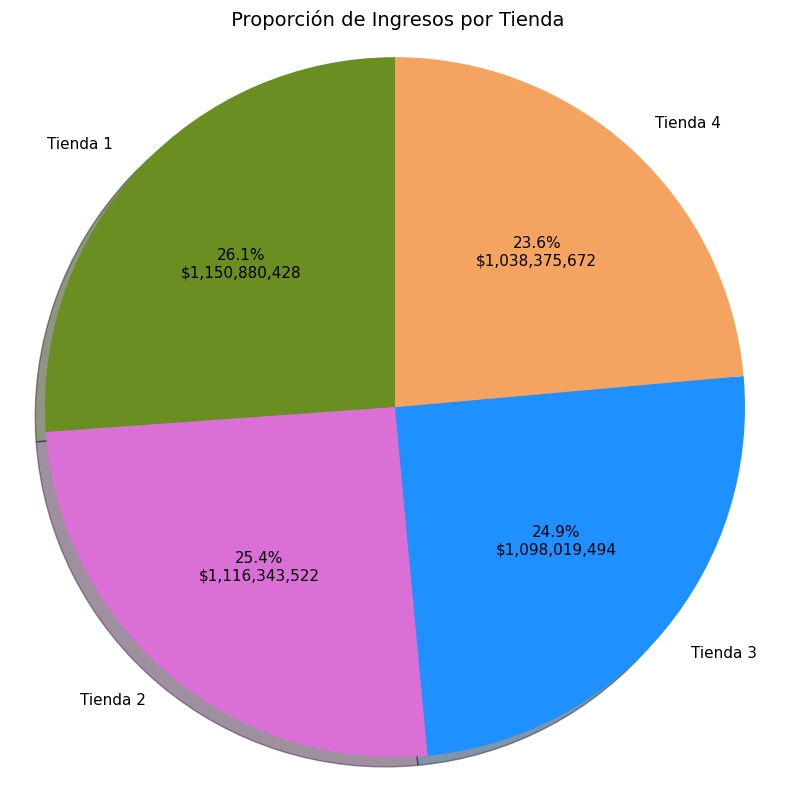

In [62]:
#GRAFICO 1
import matplotlib.pyplot as plt

# Diccionario con los DataFrames de cada tienda
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

# Calcular ingresos por tienda
ingresos = {nombre: df["Precio"].sum() for nombre, df in tiendas.items()}
nombres_tiendas = list(ingresos.keys())
valores = list(ingresos.values())
total = sum(valores)

# Función para mostrar % y valor en dólares
def autopct_format(pct):
    valor = pct * total / 100
    return f"{pct:.1f}%\n${valor:,.0f}"

# Colores personalizados
colores = ["#6B8E23", "#DA70D6", "#1E90FF", "#F4A460"]

# Crear el gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(valores, labels=nombres_tiendas, autopct=autopct_format, startangle=90,
        colors=colores, shadow=True, textprops={'fontsize': 11})
plt.title(" Proporción de Ingresos por Tienda", fontsize=14)
plt.axis("equal")  # Para que el gráfico sea un círculo
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [63]:
#calcular la cantidad de productos vendidos por categoría en cada tienda. agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.
from collections import defaultdict
#crear un diccionario para contar las ventas por categoría
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

for tienda_nombre, tienda_iterable in tiendas.items():
    print(f"{tienda_nombre} \n")

    #Conteo de categorías
    conteo_categorias_1 = defaultdict(int)
    for categoria in tienda_iterable['Categoría del Producto']:
        conteo_categorias_1[categoria] += 1

    #Mostrar resultados en consola
    for categoria, cantidad in conteo_categorias_1.items():
        print(f"Categoría => {categoria} | Ventas => {cantidad}")

    top_1 = max(conteo_categorias_1.items(), key=lambda x: x[1])
    low_1 = min(conteo_categorias_1.items(), key=lambda x: x[1])

    print(f"\nCategoría más vendida: {top_1[0]} con {top_1[1]} ventas")
    print(f"Categoría menos vendida: {low_1[0]} con {low_1[1]} ventas\n")

Tienda 1 

Categoría => Electrónicos | Ventas => 448
Categoría => Muebles | Ventas => 465
Categoría => Juguetes | Ventas => 324
Categoría => Electrodomésticos | Ventas => 312
Categoría => Artículos para el hogar | Ventas => 171
Categoría => Deportes y diversión | Ventas => 284
Categoría => Libros | Ventas => 173
Categoría => Instrumentos musicales | Ventas => 182

Categoría más vendida: Muebles con 465 ventas
Categoría menos vendida: Artículos para el hogar con 171 ventas

Tienda 2 

Categoría => Muebles | Ventas => 442
Categoría => Instrumentos musicales | Ventas => 224
Categoría => Deportes y diversión | Ventas => 275
Categoría => Electrónicos | Ventas => 422
Categoría => Artículos para el hogar | Ventas => 181
Categoría => Juguetes | Ventas => 313
Categoría => Electrodomésticos | Ventas => 305
Categoría => Libros | Ventas => 197

Categoría más vendida: Muebles con 442 ventas
Categoría menos vendida: Artículos para el hogar con 181 ventas

Tienda 3 

Categoría => Electrodomésticos | 

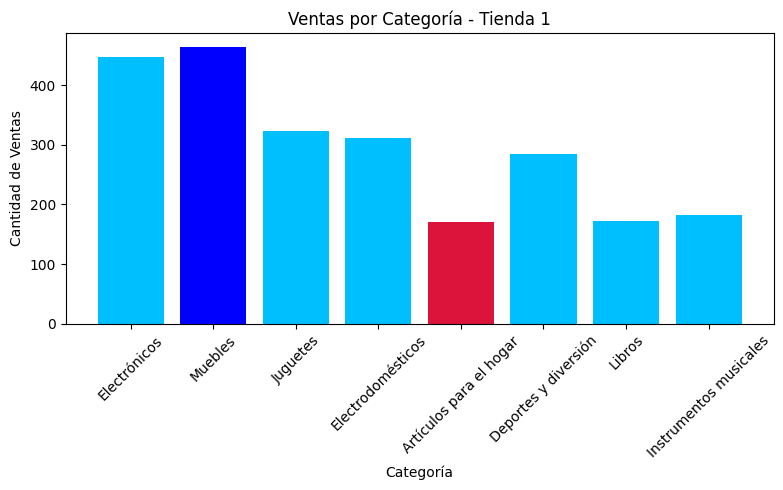

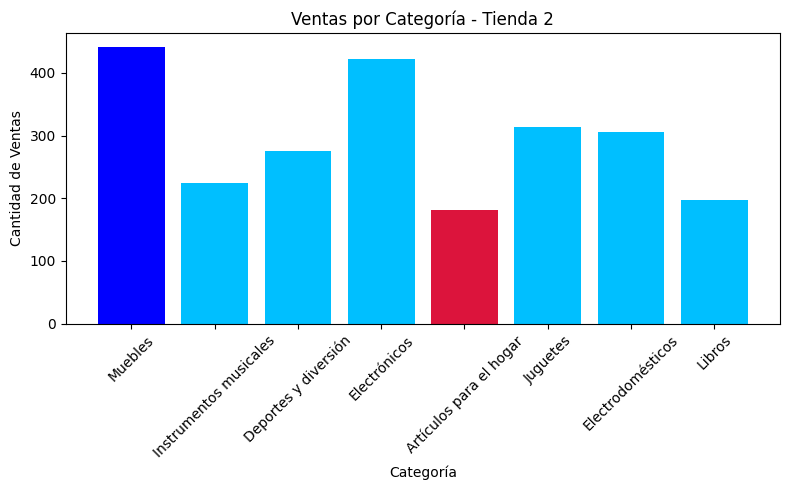

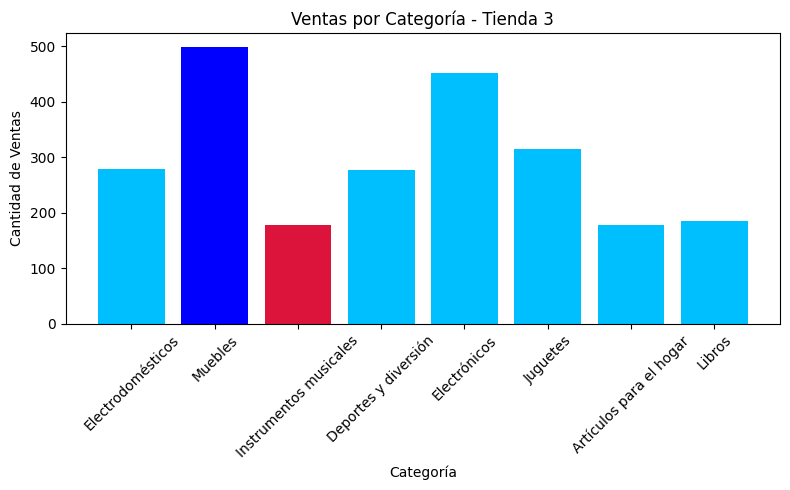

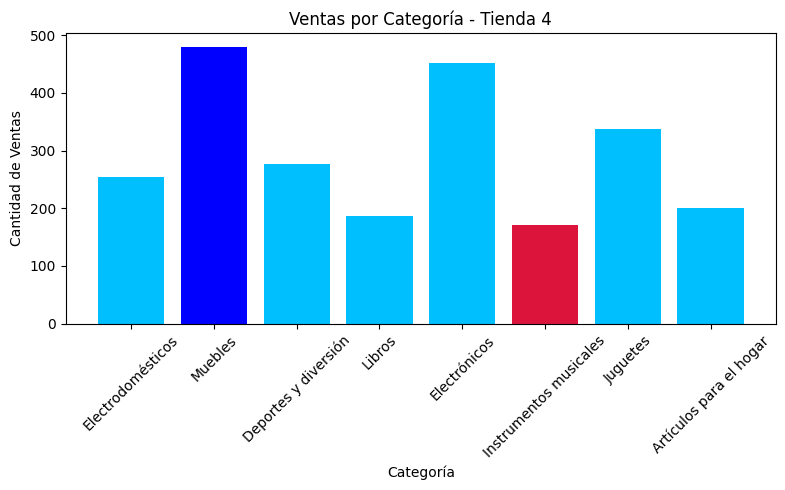

In [71]:
#GRAFICO 2
import matplotlib.pyplot as plt
from collections import defaultdict

tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

for tienda_nombre, tienda_iterable in tiendas.items():
    print()


    # Conteo de categorías
    conteo_categorias_1 = defaultdict(int)
    for categoria in tienda_iterable['Categoría del Producto']:
        conteo_categorias_1[categoria] += 1


    top_1 = max(conteo_categorias_1.items(), key=lambda x: x[1])
    low_1 = min(conteo_categorias_1.items(), key=lambda x: x[1])


    # Gráfico de barras
    categorias = list(conteo_categorias_1.keys())
    ventas = list(conteo_categorias_1.values())

    colores = ['blue' if cat == top_1[0] else 'Crimson' if cat == low_1[0] else 'DeepSkyBlue' for cat in categorias]

    plt.figure(figsize=(8, 5))
    plt.bar(categorias, ventas, color=colores)
    plt.title(f"Ventas por Categoría - {tienda_nombre}")
    plt.xlabel("Categoría")
    plt.ylabel("Cantidad de Ventas")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 3. Calificación promedio de la tienda


Tienda 1: Calificación promedio = 3.98
Tienda 2: Calificación promedio = 4.04
Tienda 3: Calificación promedio = 4.05
Tienda 4: Calificación promedio = 4.00


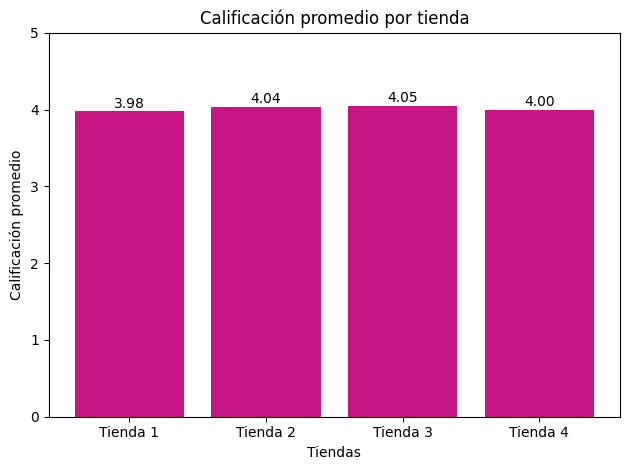

In [65]:
#Calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.
import matplotlib.pyplot as plt

#Diccionario de tiendas
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

nombres_tiendas = []
calificaciones_promedio = []

#Calcular promedios. Bucle para calcular promedio de calificación por tienda
for nombre, df in tiendas.items():
    promedio = df["Calificación"].mean()
    nombres_tiendas.append(nombre)
    calificaciones_promedio.append(promedio)
    print(f"{nombre}: Calificación promedio = {promedio:.2f}")

#Crear gráfico
plt.bar(nombres_tiendas, calificaciones_promedio, color='MediumVioletRed')
plt.title("Calificación promedio por tienda")
plt.ylabel("Calificación promedio")
plt.xlabel("Tiendas")
plt.ylim(0, 5)

#Agregar etiquetas de calificación sobre cada barra
for i, valor in enumerate(calificaciones_promedio):
    plt.text(i, valor + 0.05, f"{valor:.2f}", ha='center')

plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [66]:
#Identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.
# Creamos un diccionario con el nombre de cada tienda y su DataFrame correspondiente
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}


# Recorremos cada tienda y su DataFrame
for nombre, df in tiendas.items():
    # Contar ventas por producto
    ventas = df["Producto"].value_counts()#value_counts() cuenta cuántas veces se repite cada valor en la columna "Producto".

    # Obtener el valor máximo (producto más vendido) y el mínimo (menos vendido).
    max_ventas = ventas.max()
    min_ventas = ventas.min()

    productos_max = ventas[ventas == max_ventas].index.tolist()#ventas == max_ventas devuelve una serie booleana con True para los productos más vendidos.
    productos_min = ventas[ventas == min_ventas].index.tolist()#.index.tolist() extrae los nombres de los productos como una lista de strings.

    print(f"\n {nombre}")
    print(f" Producto(s) más vendido(s) ({max_ventas} ventas): {', '.join(productos_max)}")
    print(f" Producto(s) menos vendido(s) ({min_ventas} ventas): {', '.join(productos_min)}")#', '.join(lista) convierte una lista en un texto separado por comas.


 Tienda 1
 Producto(s) más vendido(s) (60 ventas): Microondas, TV LED UHD 4K, Armario
 Producto(s) menos vendido(s) (33 ventas): Auriculares con micrófono, Celular ABXY

 Tienda 2
 Producto(s) más vendido(s) (65 ventas): Iniciando en programación
 Producto(s) menos vendido(s) (32 ventas): Juego de mesa

 Tienda 3
 Producto(s) más vendido(s) (57 ventas): Kit de bancas
 Producto(s) menos vendido(s) (35 ventas): Bloques de construcción

 Tienda 4
 Producto(s) más vendido(s) (62 ventas): Cama box
 Producto(s) menos vendido(s) (33 ventas): Guitarra eléctrica


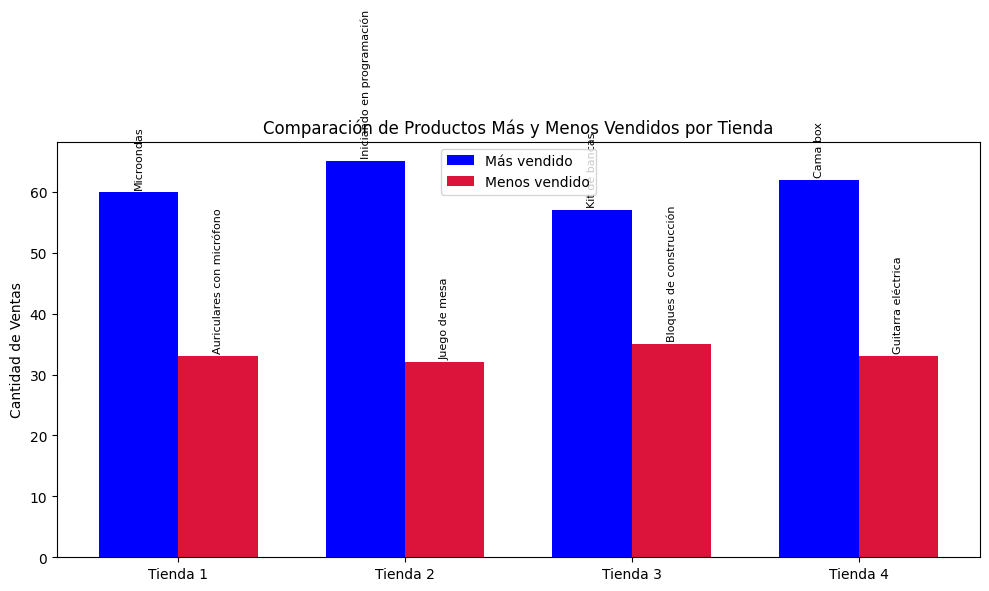

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Datos que ya tenías:
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

productos_mas_vendidos = []
ventas_mas_vendidas = []
productos_menos_vendidos = []
ventas_menos_vendidas = []
nombres_tiendas = []

for nombre, df in tiendas.items():
    ventas = df["Producto"].value_counts()

    max_ventas = ventas.max()
    min_ventas = ventas.min()

    productos_max = ventas[ventas == max_ventas].index.tolist()
    productos_min = ventas[ventas == min_ventas].index.tolist()

    productos_mas_vendidos.append(productos_max[0])
    productos_menos_vendidos.append(productos_min[0])
    ventas_mas_vendidas.append(max_ventas)
    ventas_menos_vendidas.append(min_ventas)
    nombres_tiendas.append(nombre)

# Crear posiciones en el eje x
x = np.arange(len(nombres_tiendas))
width = 0.35  # ancho de las barras

# Crear gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(10, 6))
barras_max = ax.bar(x - width/2, ventas_mas_vendidas, width, label='Más vendido', color='Blue')
barras_min = ax.bar(x + width/2, ventas_menos_vendidas, width, label='Menos vendido', color='Crimson')

# Añadir etiquetas de producto sobre las barras
for i in range(len(x)):
    ax.text(x[i] - width/2, ventas_mas_vendidas[i] + 0.5, productos_mas_vendidos[i], ha='center', va='bottom', fontsize=8, rotation=90)
    ax.text(x[i] + width/2, ventas_menos_vendidas[i] + 0.5, productos_menos_vendidos[i], ha='center', va='bottom', fontsize=8, rotation=90)

# Personalización
ax.set_ylabel('Cantidad de Ventas')
ax.set_title('Comparación de Productos Más y Menos Vendidos por Tienda')
ax.set_xticks(x)
ax.set_xticklabels(nombres_tiendas)
ax.legend()
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [68]:
#Calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.
# Recorrer cada tienda para calcular el promedio del costo de envío
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

for nombre, df in tiendas.items():
    promedio_envio = round(df["Costo de envío"].mean(), 2)
    print(f" {nombre}: Costo de envío promedio = ${promedio_envio}")

 Tienda 1: Costo de envío promedio = $26018.61
 Tienda 2: Costo de envío promedio = $25216.24
 Tienda 3: Costo de envío promedio = $24805.68
 Tienda 4: Costo de envío promedio = $23459.46


# 6. Informe Final

In [ ]:
'''
Análisis del proyecto
 Introducción:
 A continuación se muestra los resultados de los factores analizados del proyecto para el análisis de datos de las cuatro tiendas, el propósito de dicho análisis es para conocer
cual de las cuatro tiendas tiene mayor rendimiento y recomendar al Sr. Juan la tienda que debe vender.
Los ingresos totales de las tiendas fueron los siguientes:
Tienda 1: $1,150,880,400.00
Tienda 2: $1,116,343,500.00
Tienda 3: $1,098,019,600.00
Tienda 4: $1,038,375,700.00.
Según lo observado la tienda 1 es la tienda que obtubo mayor número de ingresos por lo cual es una fortaleza para dicha tienda.

Las categorías de productos más y menos vendidas de cada tienda se identifican de la siguiente manera:
Tienda 1
Categoría más vendida: Muebles con 465 ventas
Categoría menos vendida: Artículos para el hogar con 171 ventas

Tienda 2
Categoría más vendida: Muebles con 442 ventas
Categoría menos vendida: Artículos para el hogar con 181 ventas

Tienda 3
Categoría más vendida: Muebles con 499 ventas
Categoría menos vendida: Instrumentos musicales con 177 ventas

Tienda 4
Categoría más vendida: Muebles con 480 ventas
Categoría menos vendida: Instrumentos musicales con 170 ventas

Como principal categoría para las cuatro tiendas es la venta de Muebles, sin embargo la Tienda 3 tiene la fortaleza de mayor en ventas.

Las calificaciones promedio de los clientes por tienda fueron las siguientes:
Tienda 1: Calificación promedio = 3.98
Tienda 2: Calificación promedio = 4.04
Tienda 3: Calificación promedio = 4.05
Tienda 4: Calificación promedio = 4.00

Como se muestra, la tienda 1 fue la que obtuvo mayor ingresos y fue la que obtuvo menor calificación de los clientes, luego le sigue la tienda 4 la cual obtuvo también menos ingresos.

Los productos más y menos vendidos de cada tienda fueron los siguientes:
Tienda 1
Producto(s) más vendido(s) (60 ventas): Microondas, TV LED UHD 4K, Armario
Producto(s) menos vendido(s) (33 ventas): Auriculares con micrófono, Celular ABXY

Tienda 2
Producto(s) más vendido(s) (65 ventas): Iniciando en programación
Producto(s) menos vendido(s) (32 ventas): Juego de mesa

Tienda 3
Producto(s) más vendido(s) (57 ventas): Kit de bancas
Producto(s) menos vendido(s) (35 ventas): Bloques de construcción

Tienda 4
Producto(s) más vendido(s) (62 ventas): Cama box
Producto(s) menos vendido(s) (33 ventas): Guitarra eléctrica

Con los datos obtenidos en el análisis, se observa que la tienda 2 tiene su fortaleza en tener como producto más vendido Iniciando en programación
 y al comparar el producto menos vendido junto con los demás productos menos vendidos
de las demás tiendas se da a conocer que la diferencia de las ventas es minima.

#El costo de envío promedio para cada tienda.
Tienda 1: Costo de envío promedio = $26018.61
Tienda 2: Costo de envío promedio = $25216.24
Tienda 3: Costo de envío promedio = $24805.68
Tienda 4: Costo de envío promedio = $23459.46


Justificación personal:
Dado a los resultados obtenidos para cada tienda y con la visualización en los respectivos gráficos. La tienda 1 en comparación con las demás tiendas tiene un costo de envio promedio más alto
y genera más ingresos, la tienda 2 tiene buenas calificaciones y tiene su fortaleza como producto más vendido Iniciando en programación.
La Tienda con mayor debilidad es la tienda 4, tiene el costo de envío más bajo que el resto de las tiendas, no se sabe si es por cuenta propia el costo del envio para la tienda
pero también es la segunda con menor calificación y la primera con ingresos más bajos.

Recomendación:
Recomiendo al señor Juan que la tienda que más destaca su rendimiento en relación con las demás tiendas es la tienda 3 por lo visto sus clientes están satisfechos porque fue la tienda que obtuvo mejor calificación
en la cual es un plus contar con las expectativas de sus clientes para una nueva compra a futuro. En comparacion con la tienda 1 y apesar que los ingresos son altos,
las calificaciones fueron las más bajas y el costo del envío es el más elevado. Tambien la tienda 4 es la que menos rendimiento tiene en general, es la más baja en categoria, la tienda que menor ingresos dió y con baja calificación.
debido a los resultados anteriores le recomiendo vender la tienda 4.
'''



SyntaxError: incomplete input (<ipython-input-58-72286bfdb15d>, line 1)